# Sleep Quality Regression Analysis

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Make plots bigger, and a bit prettier
plt.rcParams['figure.figsize'] = (20, 12)
plt.style.use('ggplot')

## Data Understanding

In [3]:
#Read in the dataset
df = pd.read_csv('Sleep_Efficiency.csv')
df.head(10)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


In [4]:
df.shape

(452, 15)

In [5]:
#Info of the dataset
df.info

<bound method DataFrame.info of       ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66

In [6]:
#Column names
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

## Pre-processing

In [7]:
#Check for missing values
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

There are some missing values in the awakenings, caffeine consumption, alcohol consumption, and exercise frequency. There aren't many missing values so I will probably fill them with the mean values of the other observations. Since sleep efficiency is my target variable, I should be able to fill the means as I won't be synthetically adding data to my target.

In [8]:
#Fill missing values
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].mean())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mean())

In [9]:
#Sanity Check for missing values
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

## Visualizations

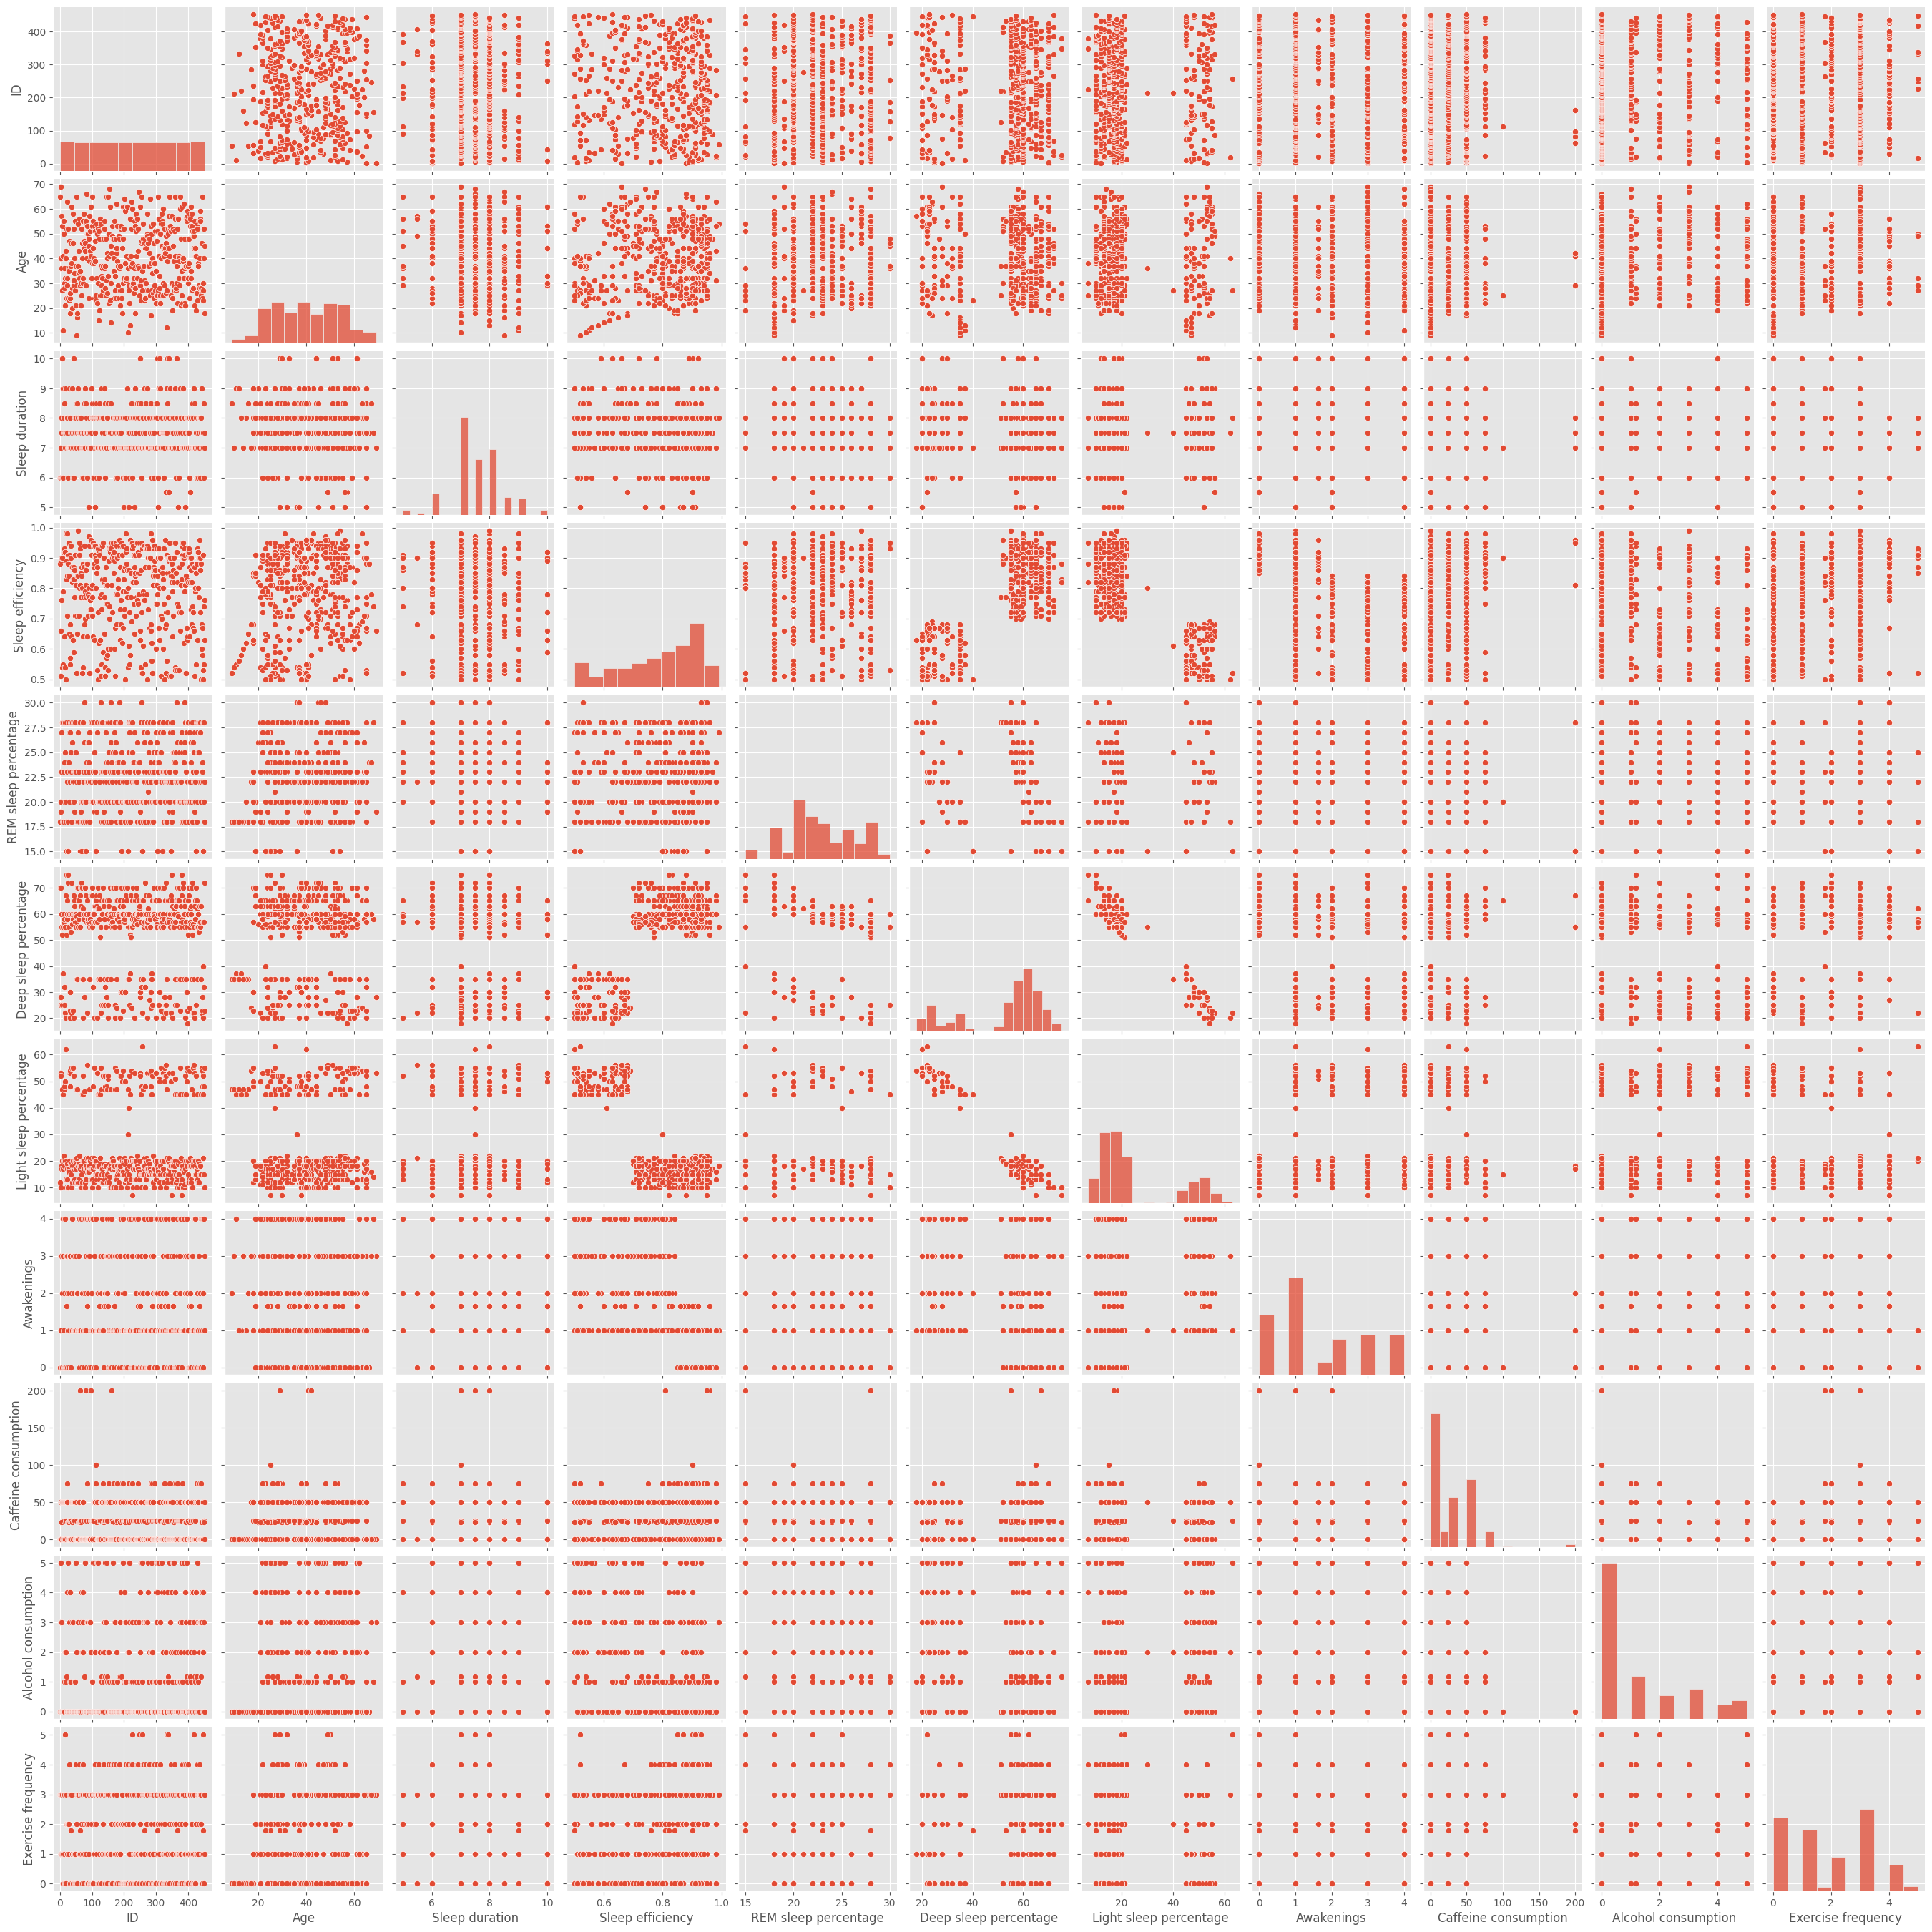

In [10]:
#Pairplot of all variables
sns.pairplot(df)

Wakeup time and sleep duration seem to have the clearest relationship in these pairplots

<Axes: xlabel='Gender', ylabel='count'>

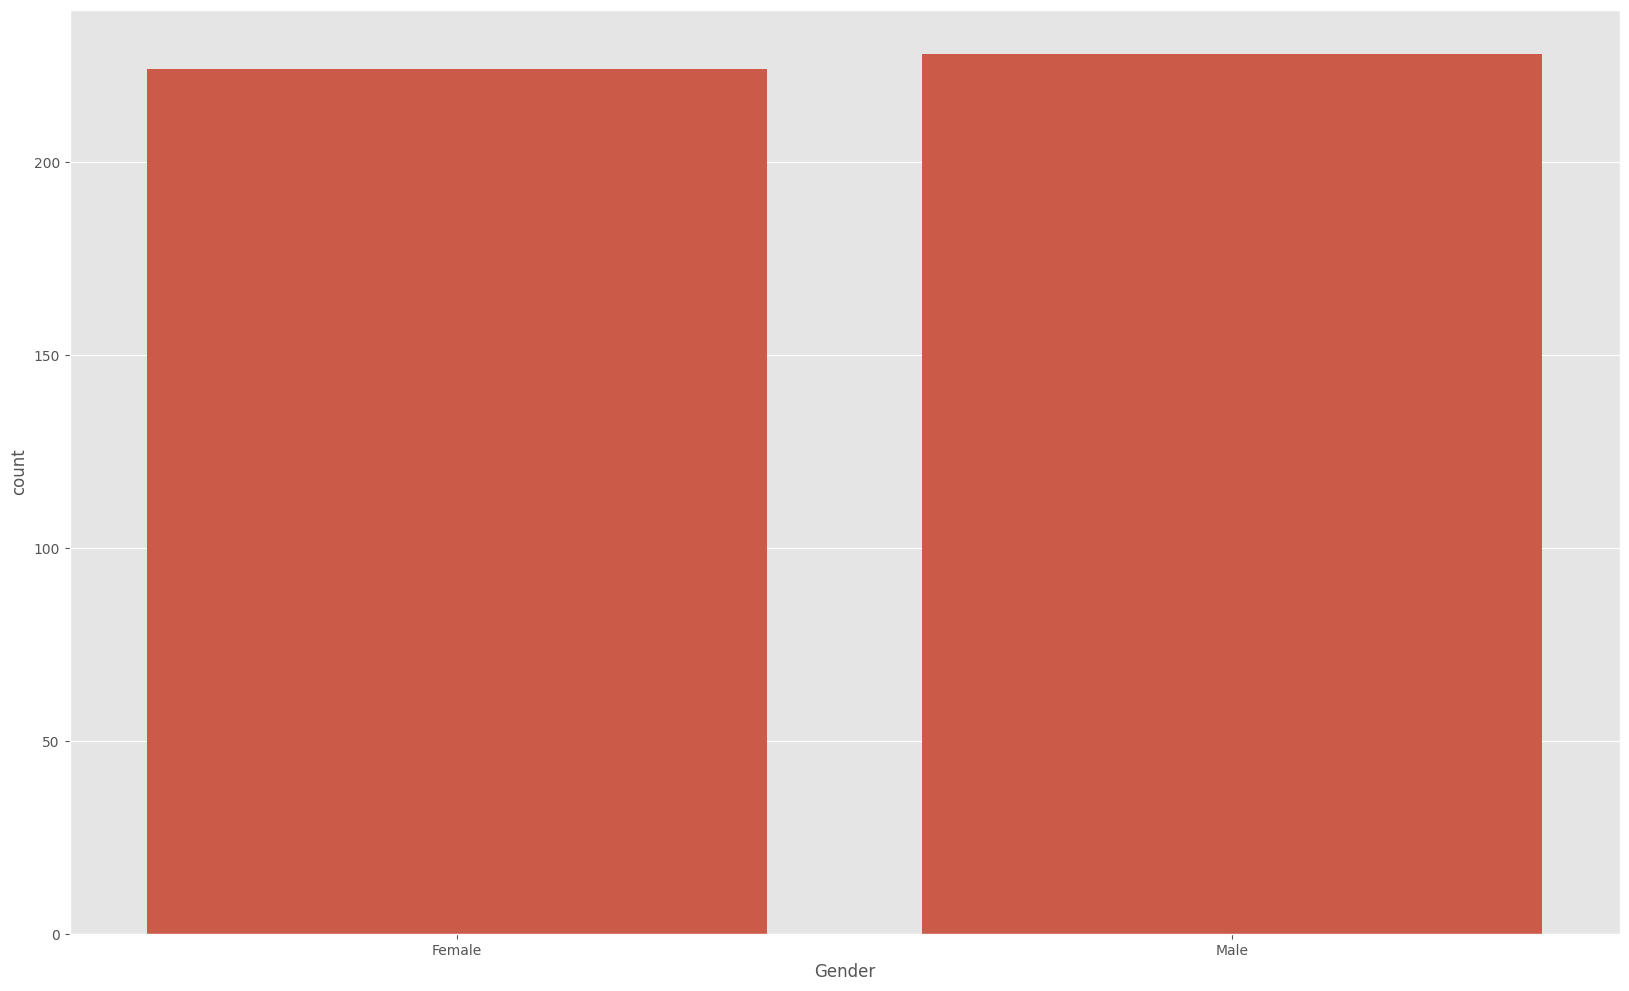

In [11]:
#Plot the distribution of gender
sns.countplot(x='Gender', data=df)

It seems this data set is pretty evenly distributed between the genders

In [12]:
#See the counts for each gender
df['Gender'].value_counts()

Gender
Male      228
Female    224
Name: count, dtype: int64

<Axes: xlabel='age_groups', ylabel='count'>

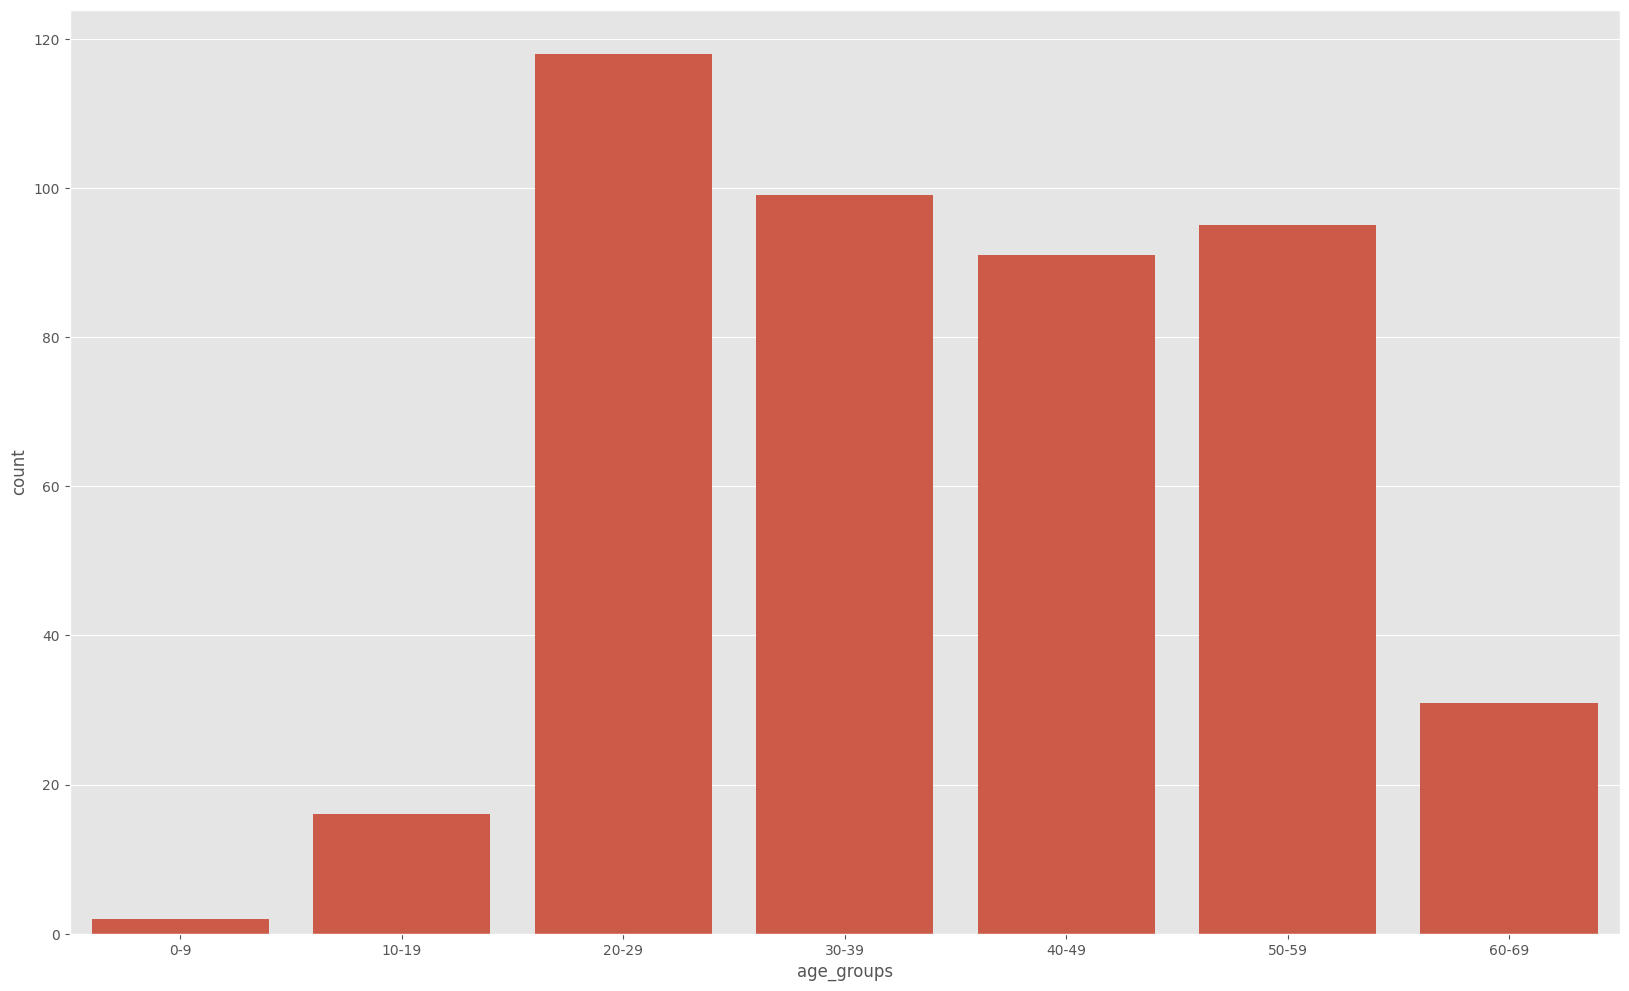

In [13]:
#Plot the distribution of age
df['age_groups'] = pd.cut(df.Age, bins = [0, 10, 20, 30, 40, 50, 60, 70], labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'])
sns.countplot(x='age_groups', data=df)

In [14]:
#See the counts for age groups
df['age_groups'].value_counts()

age_groups
20-29    118
30-39     99
50-59     95
40-49     91
60-69     31
10-19     16
0-9        2
Name: count, dtype: int64

<Axes: xlabel='age_groups', ylabel='Percentage'>

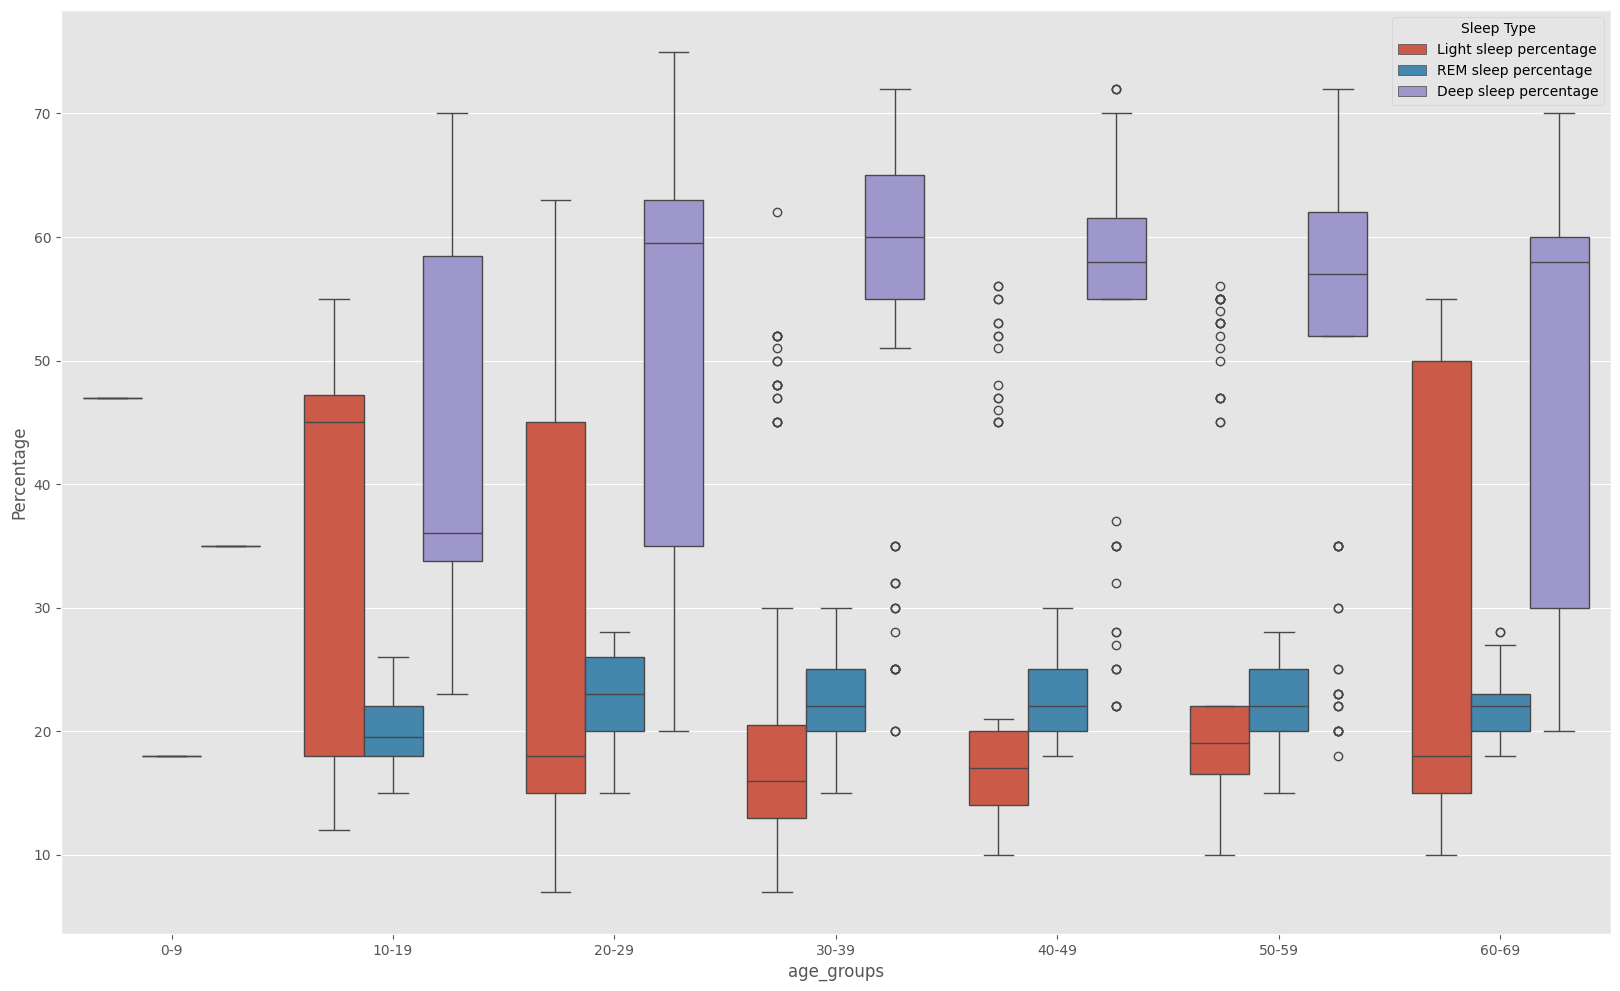

In [15]:

#Melt the dataframe to long format
df_long = pd.melt(df, id_vars=['age_groups', 'Gender'], 
                  value_vars=['Light sleep percentage', 'REM sleep percentage', 'Deep sleep percentage'], 
                  var_name='Sleep Type', value_name='Percentage')
#Plot the distribution of sleep type among the different age groups
sns.boxplot(x='age_groups', y='Percentage', hue='Sleep Type', data=df_long)

<Axes: xlabel='Sleep efficiency', ylabel='Density'>

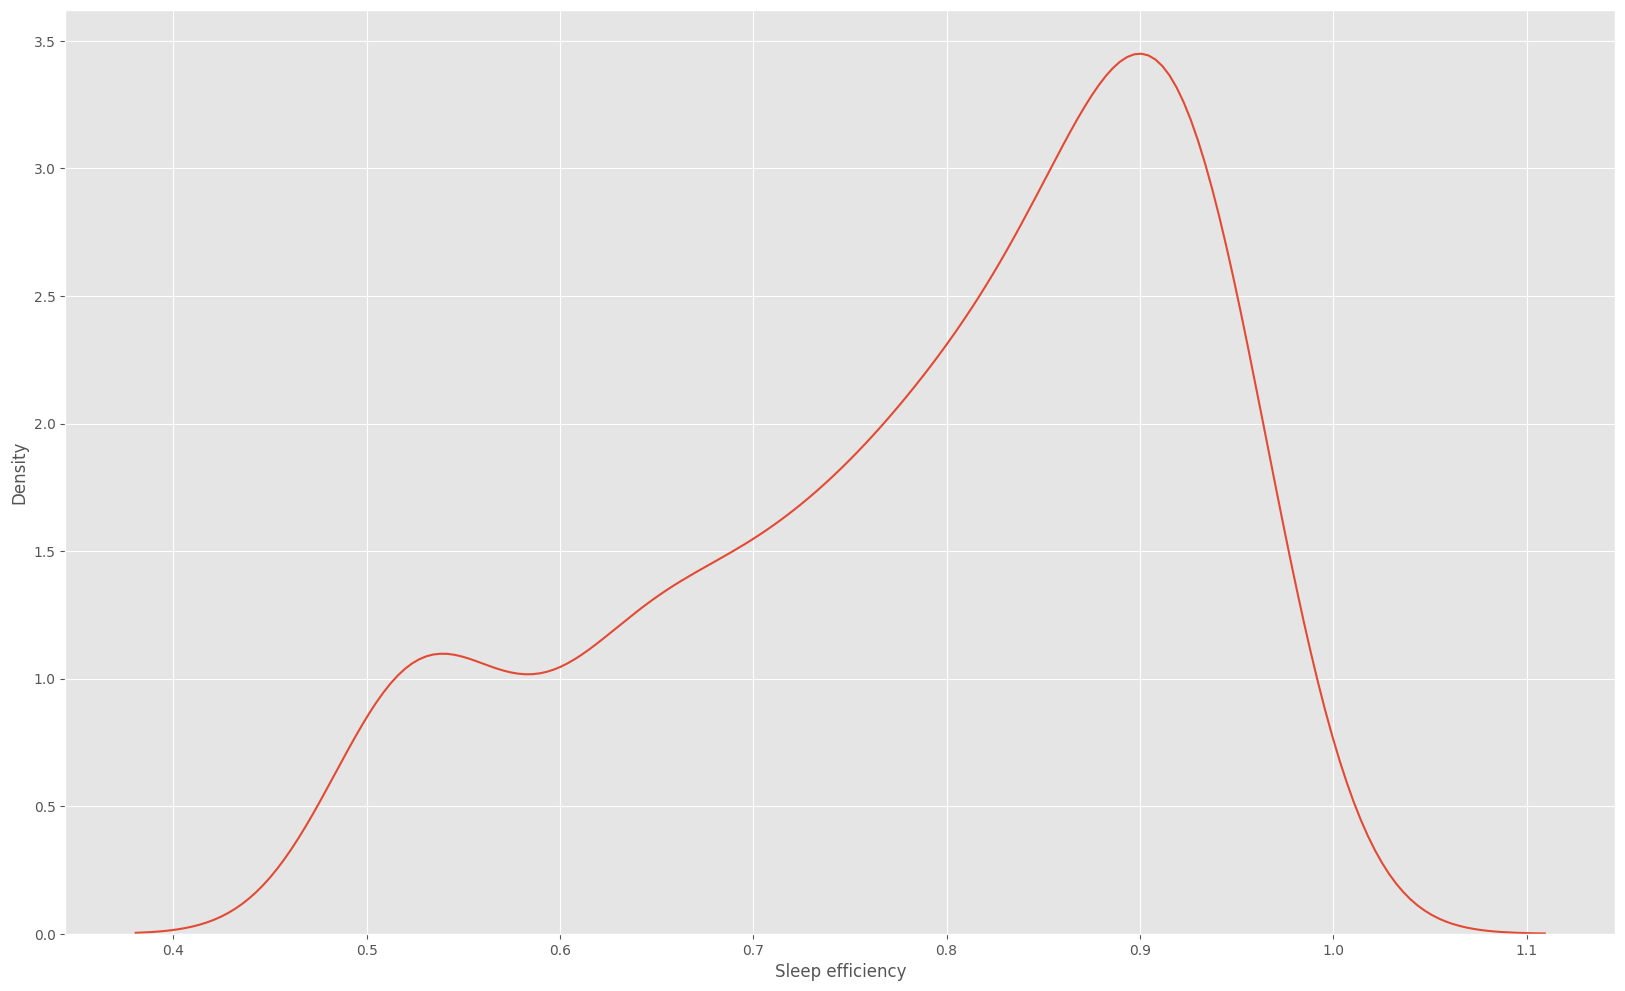

In [16]:
#Plot the distribution of sleep efficiency
sns.kdeplot(df['Sleep efficiency'])

There are more observations in the 20-30 years of age range than in the other ranges, this may have some effect on the other variables like alcohol and caffeine consumption levels.

## More pre-processing

In [17]:
#Data Types
df.dtypes

ID                           int64
Age                          int64
Gender                      object
Bedtime                     object
Wakeup time                 object
Sleep duration             float64
Sleep efficiency           float64
REM sleep percentage         int64
Deep sleep percentage        int64
Light sleep percentage       int64
Awakenings                 float64
Caffeine consumption       float64
Alcohol consumption        float64
Smoking status              object
Exercise frequency         float64
age_groups                category
dtype: object

In [18]:
#Check for duplicate values
df.duplicated().sum()

0

Some of the variables need to be changed from categorical to numeric, like the gender and smoking status. Also the bedtime and waketime columns need to be just the relevant hour and not the whole date.

In [19]:
#Change categorical gender column to numeric with one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Smoking status'], drop_first=True)

In [20]:
#Encode bedtime and wakeup time columns to the hour only
df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.hour
df['Wakeup time'] = pd.to_datetime(df['Wakeup time']).dt.hour

In [21]:
#Round caffeine consumption and awakenings to 2 decimal places
df['Caffeine consumption'] = df['Caffeine consumption'].round(2)
df['Awakenings'] = df['Awakenings'].round(2)

In [22]:
#Drop the id column and age_groups columns
df.drop(['ID', 'age_groups'], axis=1, inplace=True)

In [23]:
#Import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
#Split the dataset
X = df.drop('Sleep efficiency', axis=1)
y = df['Sleep efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,Age,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes
52,9,1,9,8.5,18,35,47,2.0,0.00,0.000000,0.0,False,False
74,47,22,5,7.0,22,58,20,4.0,0.00,0.000000,0.0,True,False
26,36,0,7,7.0,28,55,17,0.0,23.65,0.000000,1.0,False,False
45,40,1,8,7.0,19,63,18,1.0,50.00,0.000000,1.0,False,False
122,48,0,7,7.0,22,58,20,1.0,0.00,0.000000,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,41,0,7,7.5,22,58,20,0.0,0.00,0.000000,0.0,True,False
192,24,0,7,7.0,15,70,15,0.0,0.00,1.173516,2.0,True,False
117,30,21,5,8.0,20,35,45,1.0,0.00,5.000000,0.0,True,True
47,27,0,7,7.5,28,60,12,1.0,50.00,1.000000,1.0,False,True


In [25]:
df.dtypes

Age                         int64
Bedtime                     int32
Wakeup time                 int32
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Exercise frequency        float64
Gender_Male                  bool
Smoking status_Yes           bool
dtype: object

## Modeling

### Experiment #1 - Linear Regression Model

In [39]:
#Train the model before finding correlations
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

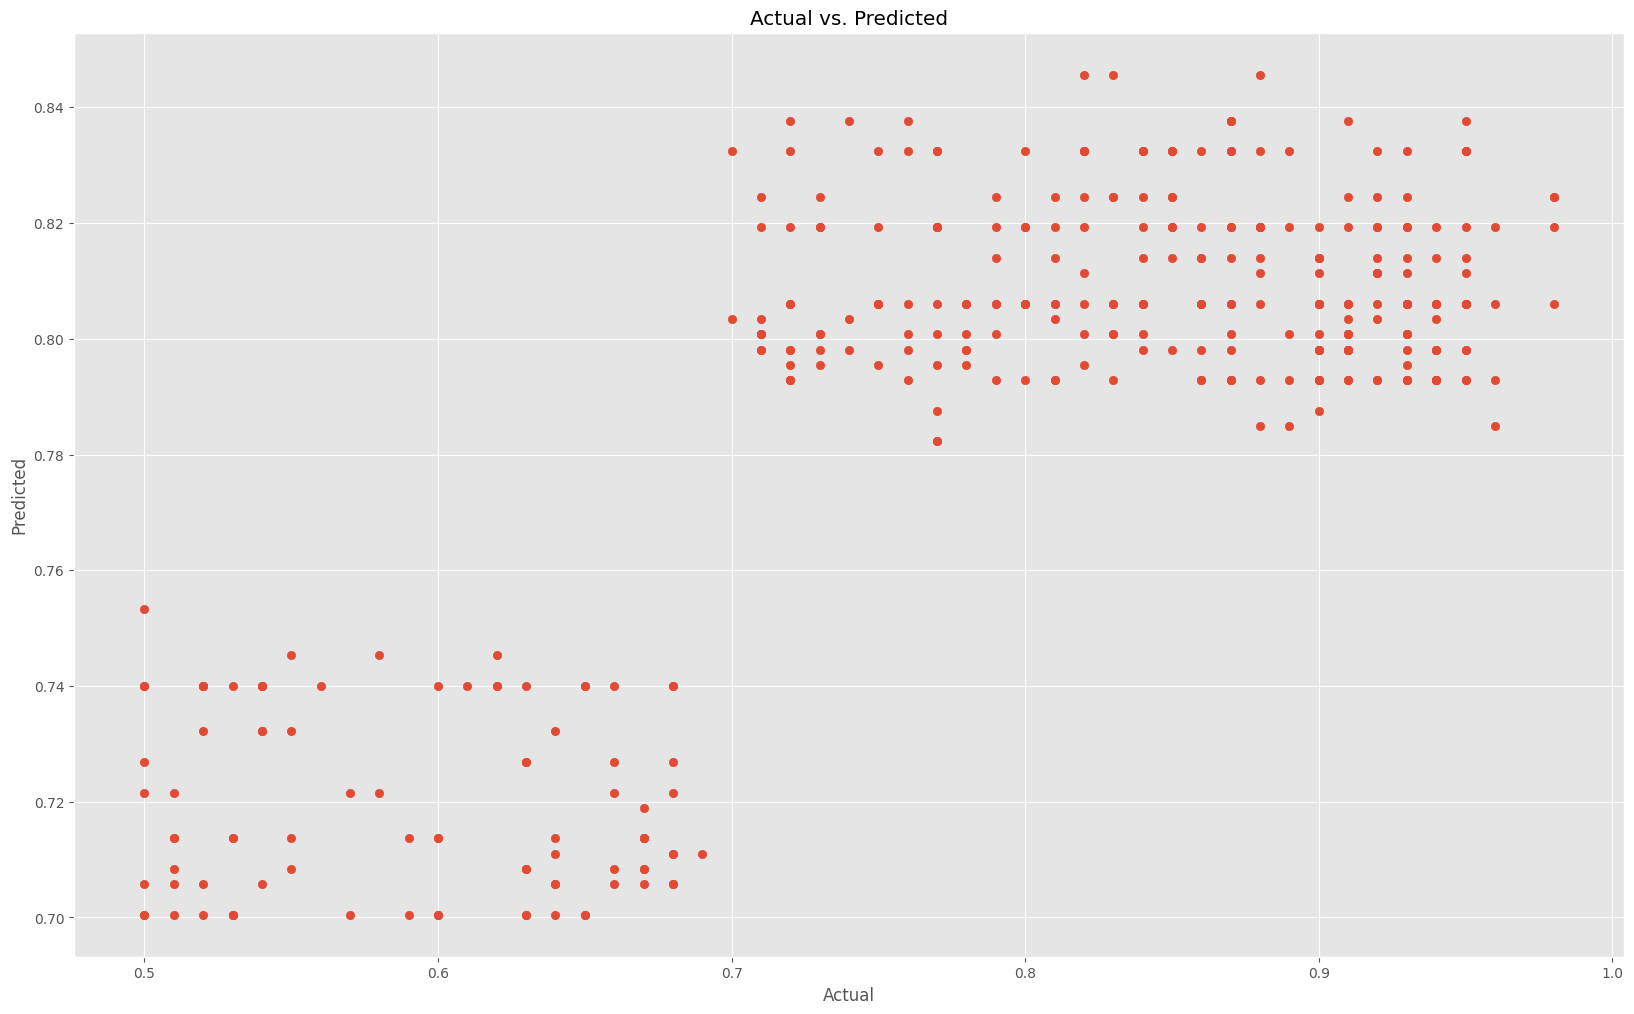

In [60]:
#Visualize the regression model
plt.scatter(y_train, model.predict(X_train))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [42]:
#Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred).round(4)
r2 = r2_score(y_test, y_pred).round(4)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse).round(4))
print("R-squared:", r2)

Mean Squared Error: 0.0047
Root Mean Squared Error: 0.0686
R-squared: 0.7429


### Experiment #2 - Linear Regression Model after dropping highly correlated features

In [28]:
#Find highly correlated variables
corr_matrix = df.corr()
corr_matrix['Sleep efficiency'].sort_values(ascending=False)

Sleep efficiency          1.000000
Deep sleep percentage     0.787335
Exercise frequency        0.257974
Bedtime                   0.124340
Age                       0.098357
Caffeine consumption      0.063121
REM sleep percentage      0.062362
Gender_Male               0.010062
Sleep duration           -0.027467
Wakeup time              -0.135595
Smoking status_Yes       -0.290026
Alcohol consumption      -0.383671
Awakenings               -0.554498
Light sleep percentage   -0.819204
Name: Sleep efficiency, dtype: float64

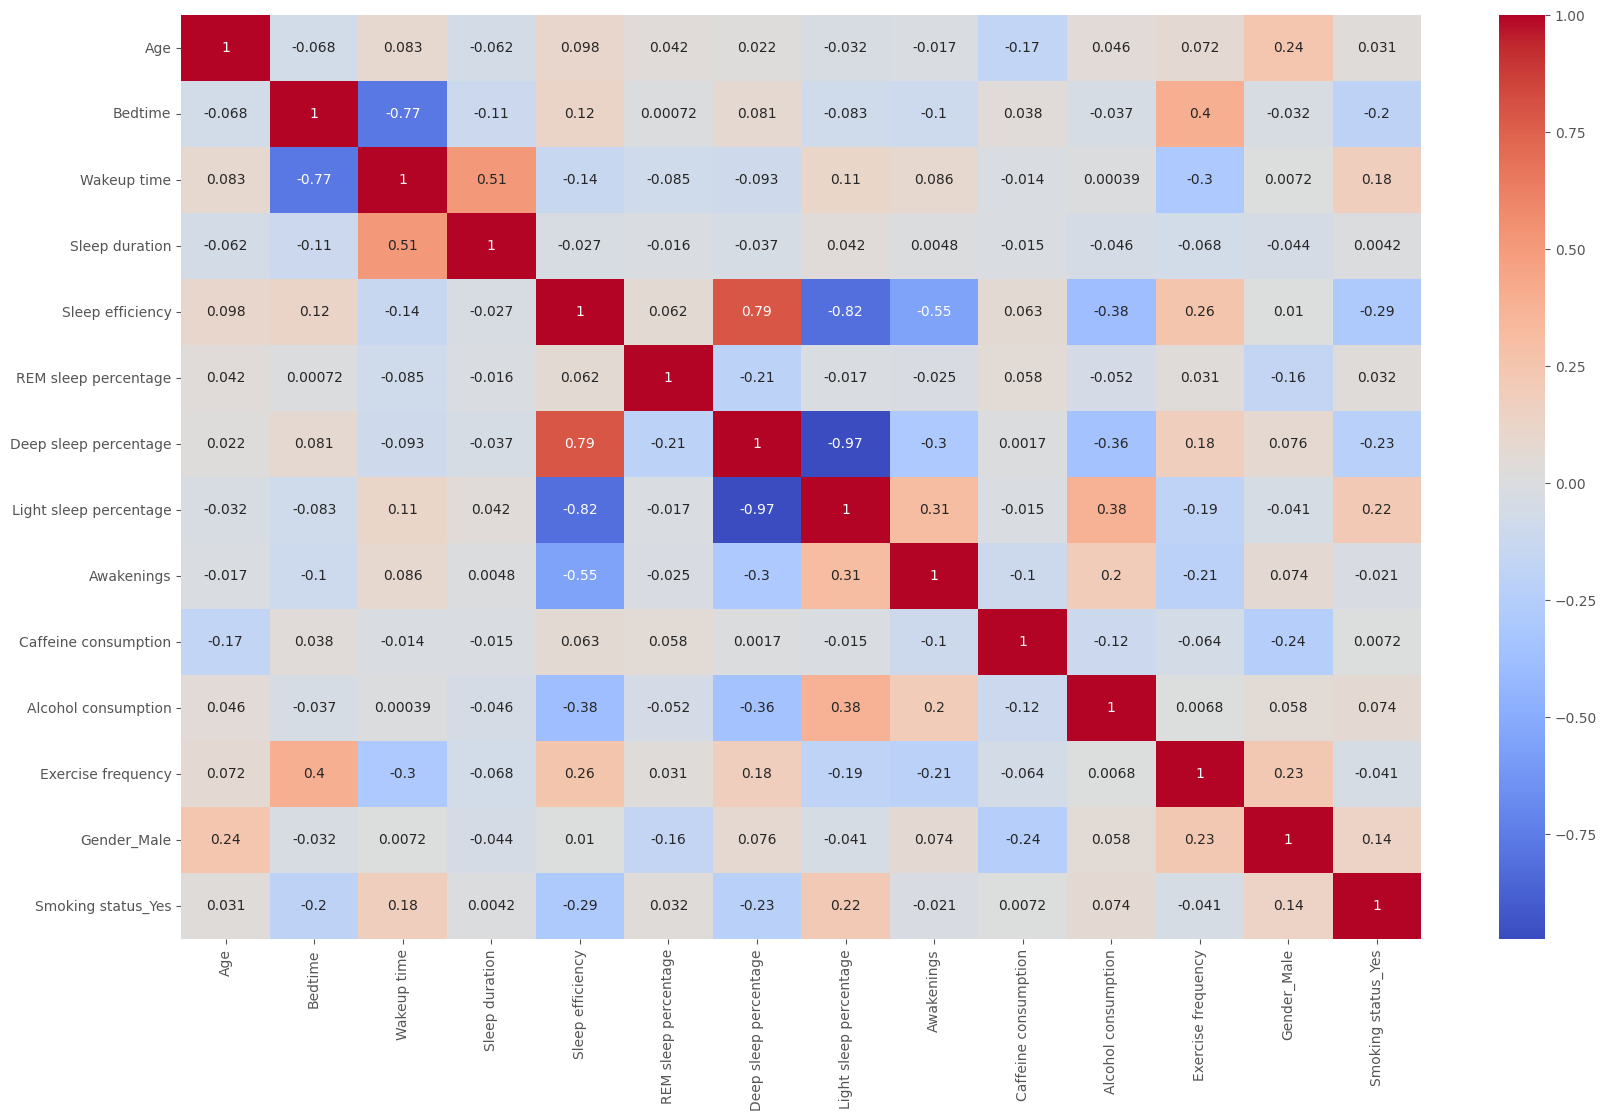

In [29]:
#Visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [30]:
#Drop the light sleep percentage & Wakeup time columns
df.drop(['Light sleep percentage', 'Wakeup time'], axis=1, inplace=True)

In [31]:
#Split the dataset again for second model
X_2 = df.drop('Sleep efficiency', axis=1)
y_2 = df['Sleep efficiency']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)     #Different random state than previous model
X_train_2

,Age,Bedtime,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes
24,24,0,7.0,15,75,1.0,23.65,5.0,2.0,True,False
17,40,23,7.5,18,20,3.0,50.00,2.0,3.0,False,True
66,25,0,7.0,15,70,4.0,0.00,4.0,2.0,True,False
301,25,0,8.5,26,56,2.0,25.00,0.0,1.0,False,False
356,51,22,8.0,20,62,0.0,0.00,0.0,4.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
106,53,21,7.0,25,20,3.0,0.00,5.0,2.0,True,False
270,44,0,8.0,23,60,1.0,23.65,0.0,0.0,False,False
348,57,1,7.0,22,65,0.0,25.00,0.0,1.0,True,True
435,40,22,7.0,28,57,0.0,0.00,0.0,3.0,False,False


In [46]:
#Train the second model
model = LinearRegression()
model.fit(X_train_2, y_train_2)

LinearRegression()

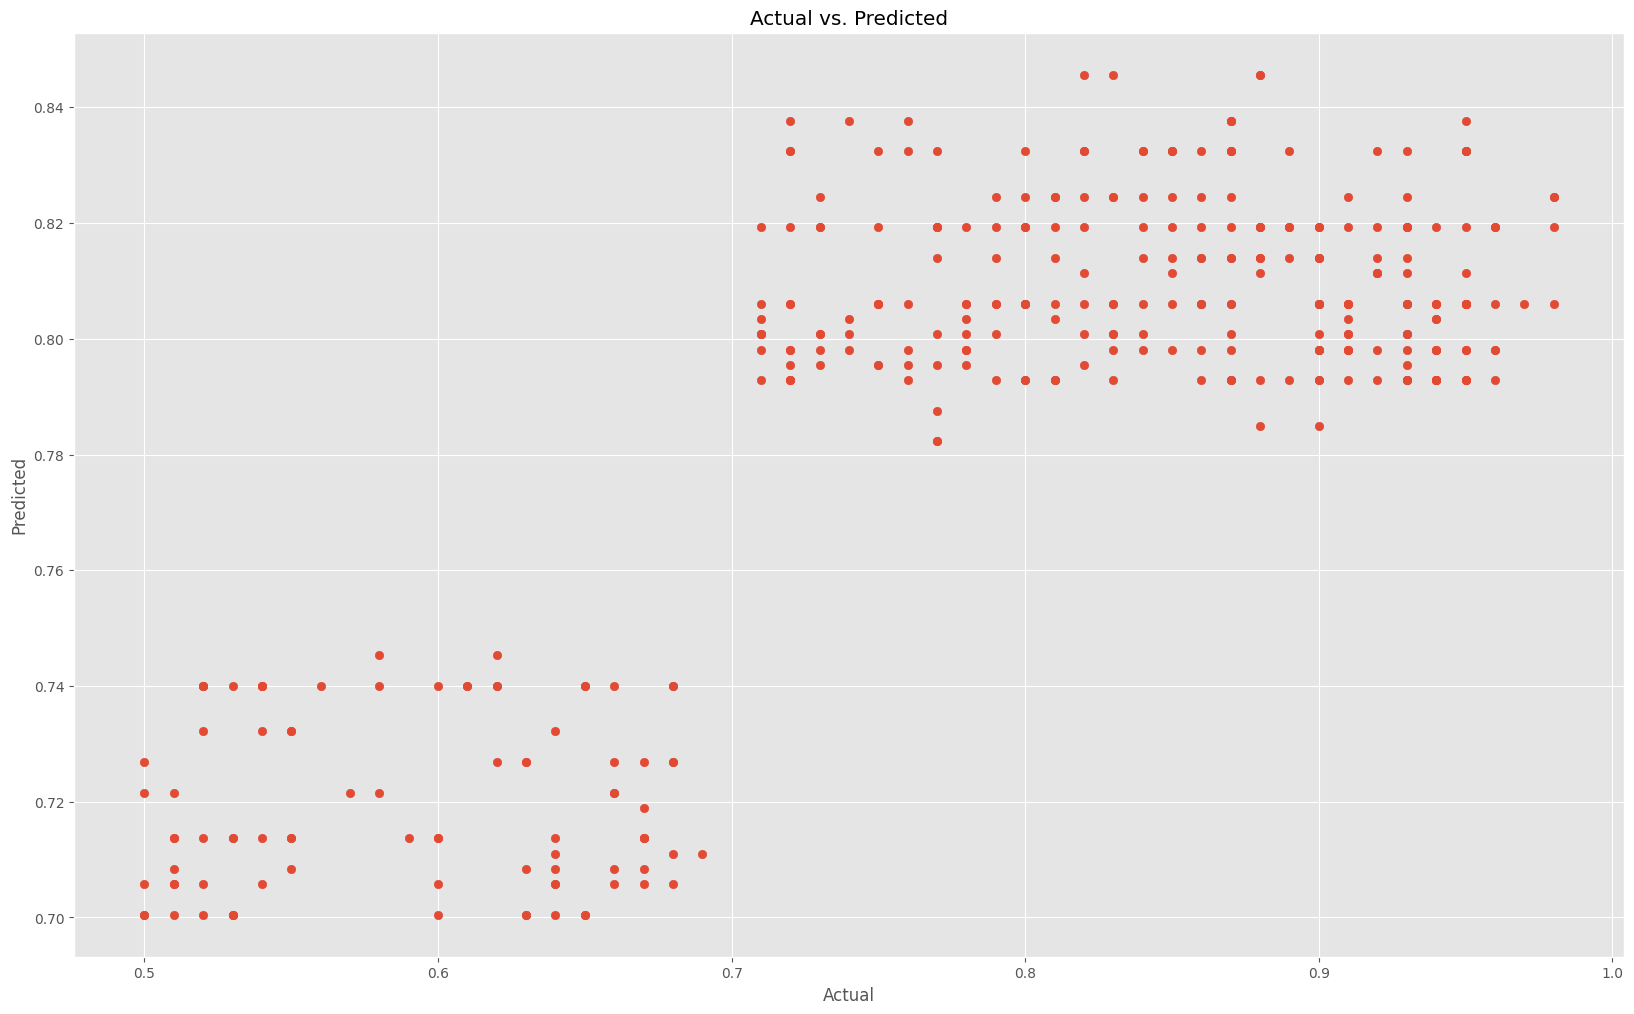

In [61]:
#Visualize the 2nd regression model
plt.scatter(y_train_2, model.predict(X_train_2))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [47]:
#Evaluate second model performance
y_pred_2 = model.predict(X_test_2)
mse = mean_squared_error(y_test_2, y_pred_2).round(4)
r2 = r2_score(y_test_2, y_pred_2).round(4)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse).round(4))
print("R-squared:", r2)

Mean Squared Error: 0.0039
Root Mean Squared Error: 0.0624
R-squared: 0.7909


### Experiment #3 - Lasso Regression Model

In [57]:
#Split the dataset again
X = df.drop('Sleep efficiency', axis=1)
y = df['Sleep efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
#Train the Lasso model
model = Lasso()
model.fit(X_train, y_train)

Lasso()

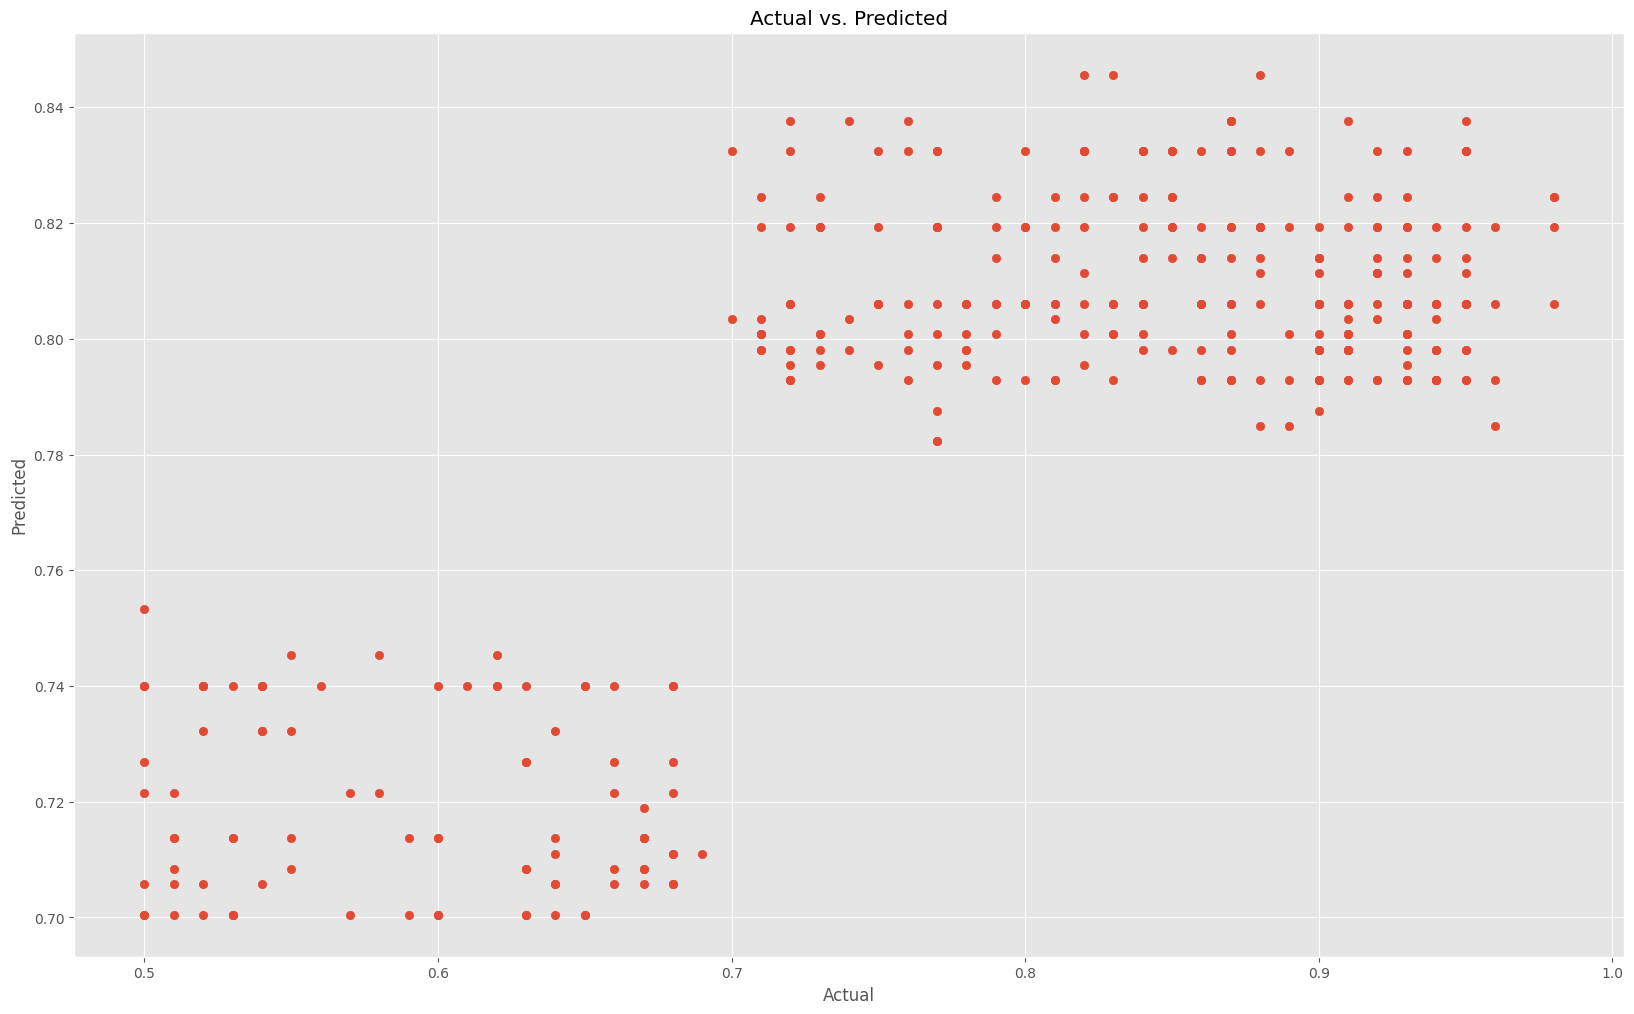

In [62]:
#Visualize the Lasso model
plt.scatter(y_train, model.predict(X_train))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [59]:
#Evaluate the Lasso model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred).round(4)
r2 = r2_score(y_test, y_pred).round(4)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse).round(4))
print("R-squared:", r2)

Mean Squared Error: 0.0112
Root Mean Squared Error: 0.1058
R-squared: 0.3946


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a33352d-fbe3-4292-b41a-6d7165c2809b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>